In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/24 21:08:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# test pyspark installation

In [6]:
import pandas as pd
from datetime import date, datetime

In [7]:
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})
df = spark.createDataFrame(pandas_df)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [8]:
df.show()
df.printSchema()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



# data preprocessing

In [9]:
import pandas as pd

In [69]:
df = pd.read_csv('./data/en.openfoodfacts.org.products.csv', sep='\t', nrows=10_000)
print(df.shape)
df.head(3)

(10000, 203)


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# _ = df.hist(figsize=(20, 10))

In [71]:
df.describe()

,created_t,last_modified_t,abbreviated_product_name,cities,allergens_en,serving_quantity,additives_n,additives,nutriscore_score,nova_group,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g
count,1.000000e+04,1.000000e+04,0.0,0.0,0.0,3873.000000,3779.000000,0.0,3014.000000,3392.000000,...,0.0,0.0,0.0,0.0,57.000000,0.0,0.0,0.0,0.0,0.0
mean,1.586847e+09,1.625711e+09,NaN,NaN,NaN,82.662510,2.955808,NaN,11.590246,3.578125,...,NaN,NaN,NaN,NaN,0.000017,NaN,NaN,NaN,NaN,NaN
std,6.790859e+07,4.822875e+07,NaN,NaN,NaN,575.751691,4.099982,NaN,9.511552,0.891206,...,NaN,NaN,NaN,NaN,0.000018,NaN,NaN,NaN,NaN,NaN
min,1.345024e+09,1.444659e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,-11.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN,NaN,NaN
25%,1.526980e+09,1.587632e+09,NaN,NaN,NaN,28.000000,0.000000,NaN,3.000000,4.000000,...,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN,NaN,NaN
50%,1.588660e+09,1.643069e+09,NaN,NaN,NaN,38.000000,1.000000,NaN,13.000000,4.000000,...,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN,NaN,NaN
75%,1.647810e+09,1.666729e+09,NaN,NaN,NaN,85.000000,4.000000,NaN,20.000000,4.000000,...,NaN,NaN,NaN,NaN,0.000018,NaN,NaN,NaN,NaN,NaN
max,1.684873e+09,1.684883e+09,NaN,NaN,NaN,35371.000000,33.000000,NaN,36.000000,4.000000,...,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,NaN,NaN,NaN


In [72]:
df[df.isna().sum(axis=1) == 0].shape

(0, 203)

In [73]:
cols = df.columns[df.dtypes == 'float64']
df = df[cols].fillna(0)
df = df[df.sum(axis=1) > len(cols)*0.05]
print(df.shape)
df.head(3)

(9776, 132)


,abbreviated_product_name,cities,allergens_en,serving_quantity,additives_n,additives,nutriscore_score,nova_group,ecoscore_score,product_quantity,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,34.0,480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embs = TSNE().fit_transform(df)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


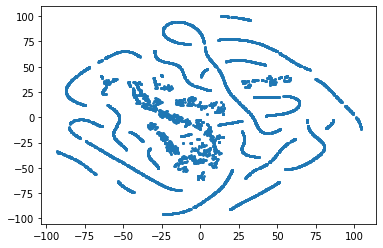

In [75]:
plt.scatter(embs[:, 0], embs[:, 1], s=3)

In [76]:
df.to_csv('data/subset.csv', index=False)